In [12]:
import librosa
from librosa import display
import os
import matplotlib.pyplot as plt

In [13]:
#data, sampling_rate = librosa.load("C:/Users/Admin/Documents/GitHub/VocalEmotionSensor/Data/ravdess/Actor_01/03-01-01-01-01-01-01.wav")
data, sampling_rate = librosa.load("Data/ravdess/Actor_01/03-01-01-01-01-01-01.wav")
#print(os.getcwd())

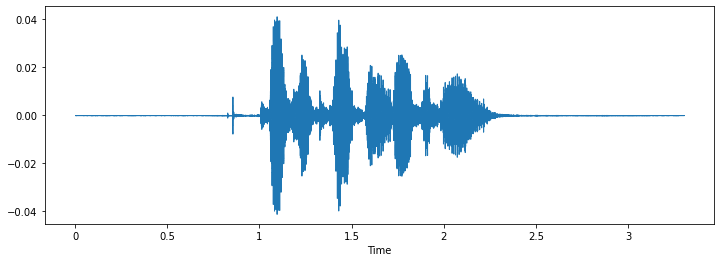

In [15]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [16]:
import os
import numpy as np
import pandas as pd
import glob 

In [17]:
path = 'C:/Users/Admin/Documents/GitHub/VocalEmotionSensor/Data/ravdess/'
lst = []

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      except ValueError:
        continue

In [19]:
X, y = zip(*lst)

In [20]:
X = np.asarray(X)
y = np.asarray(y)


#X.shape, y.shape

((1440, 40), (1440,))